# <center>DATA.ML.200 Pattern Recognition and Machine Learning</center>

## <center>Exercise 4</center>

### <center>Md. Abdullah-Al Mamun</center>

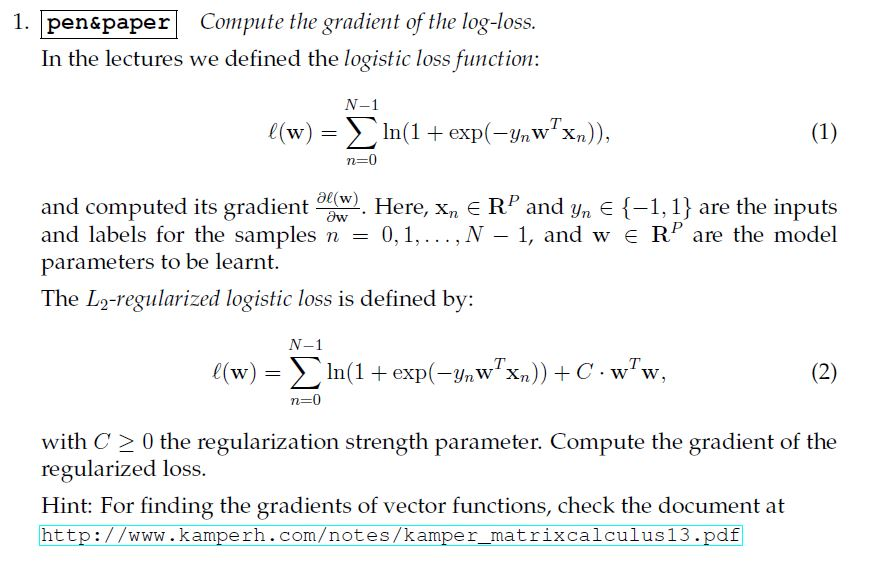

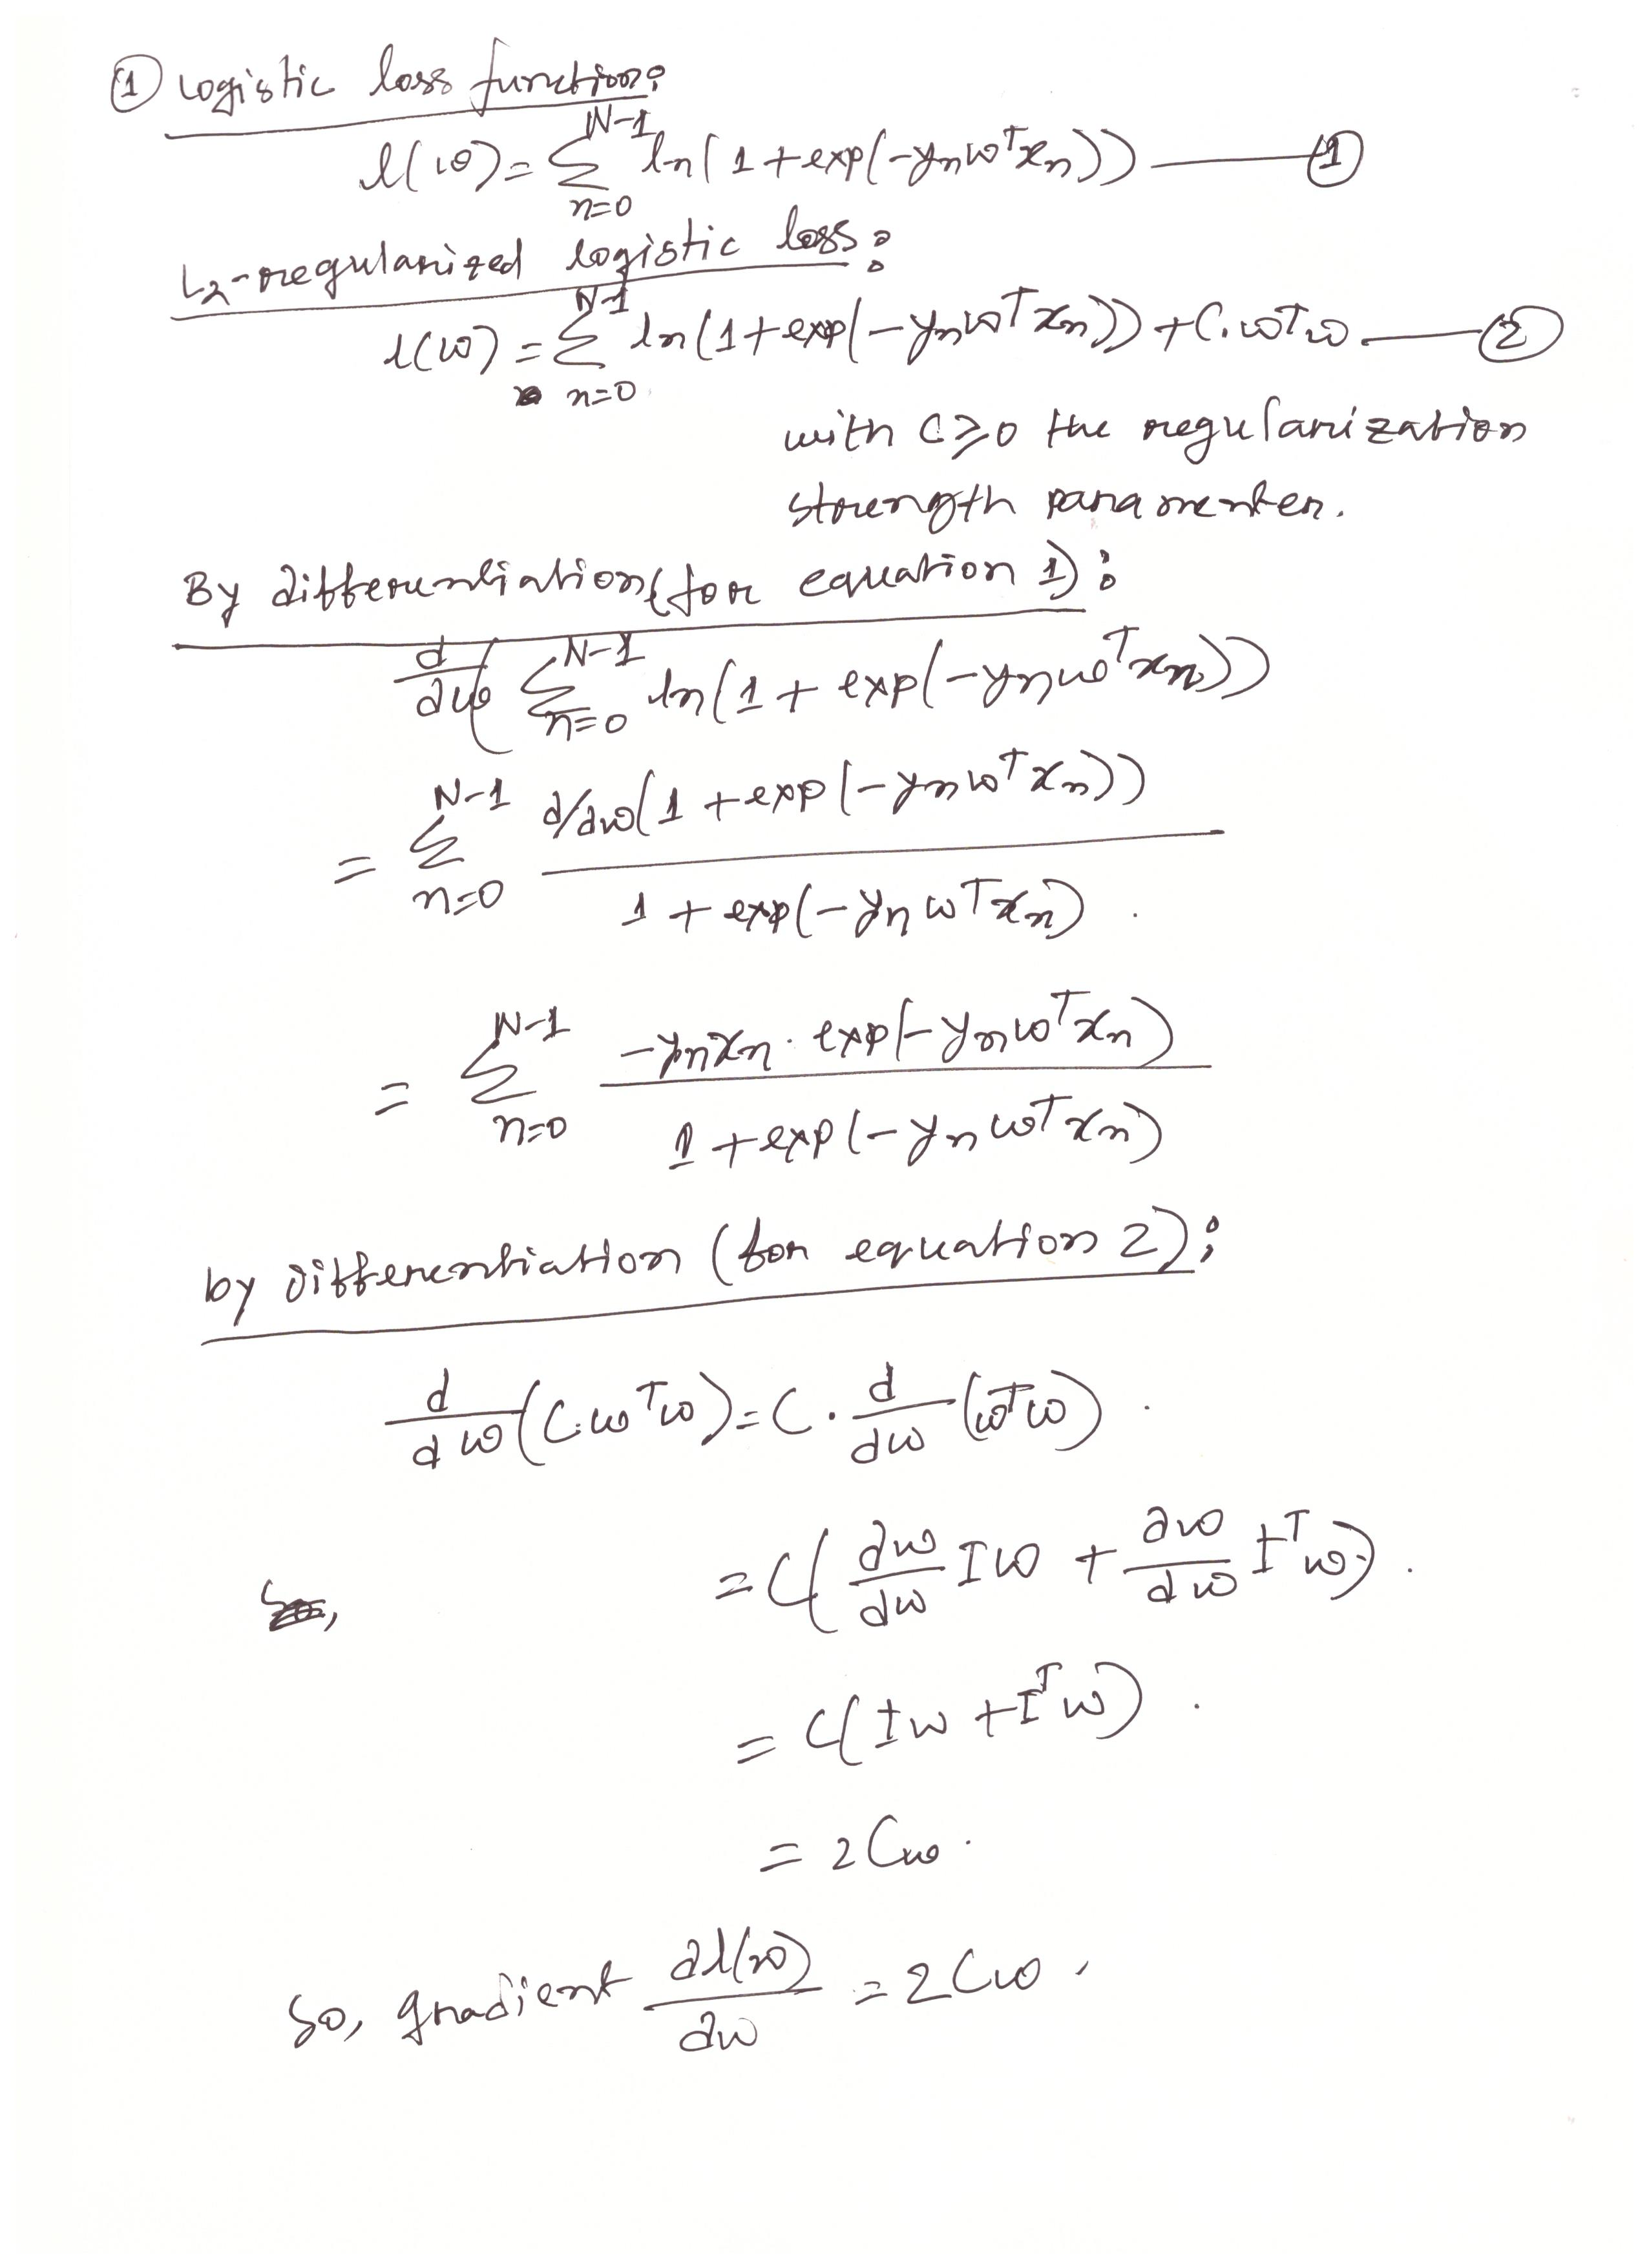

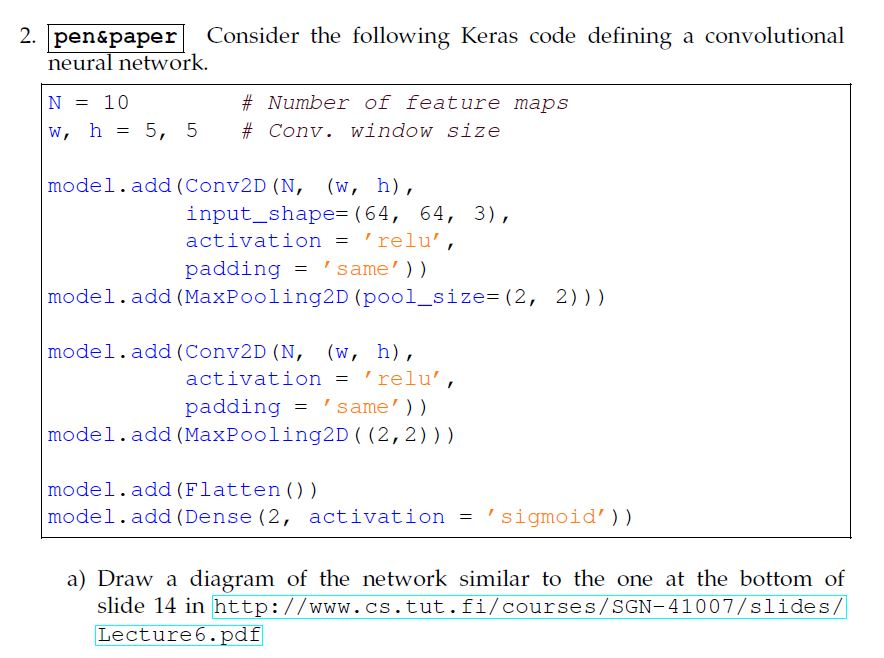
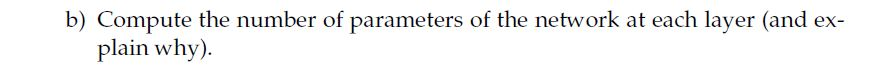

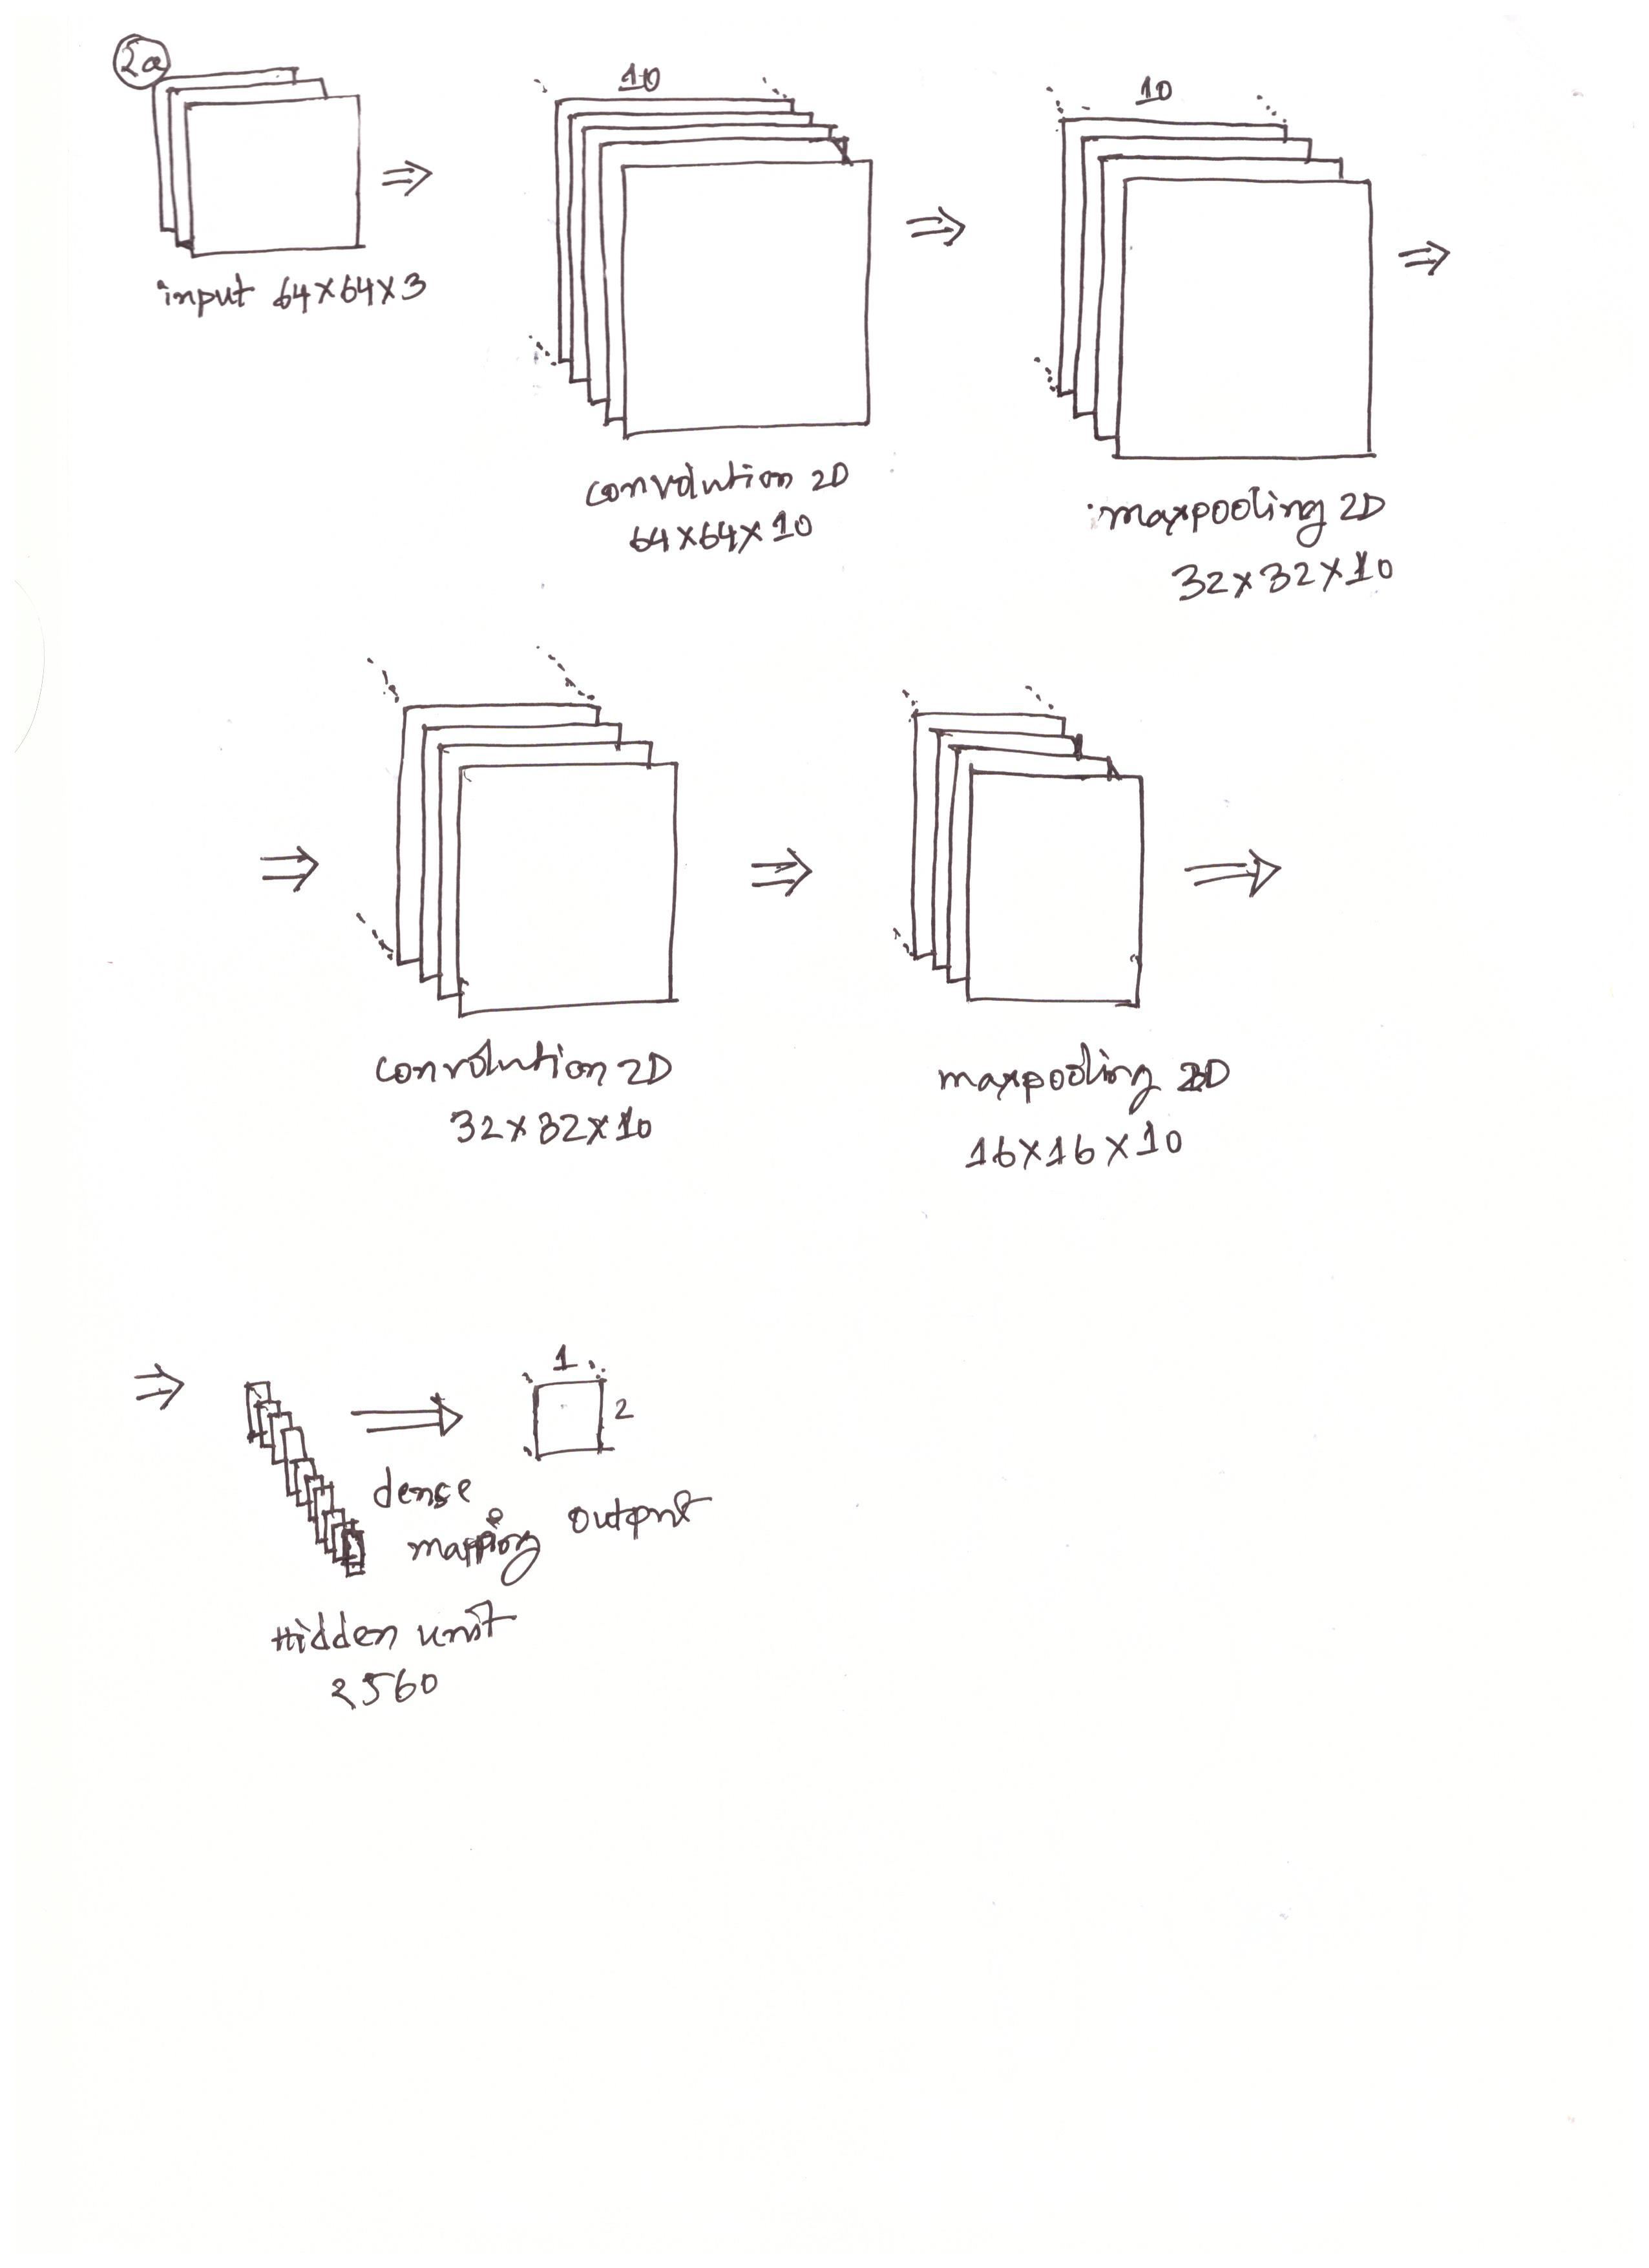

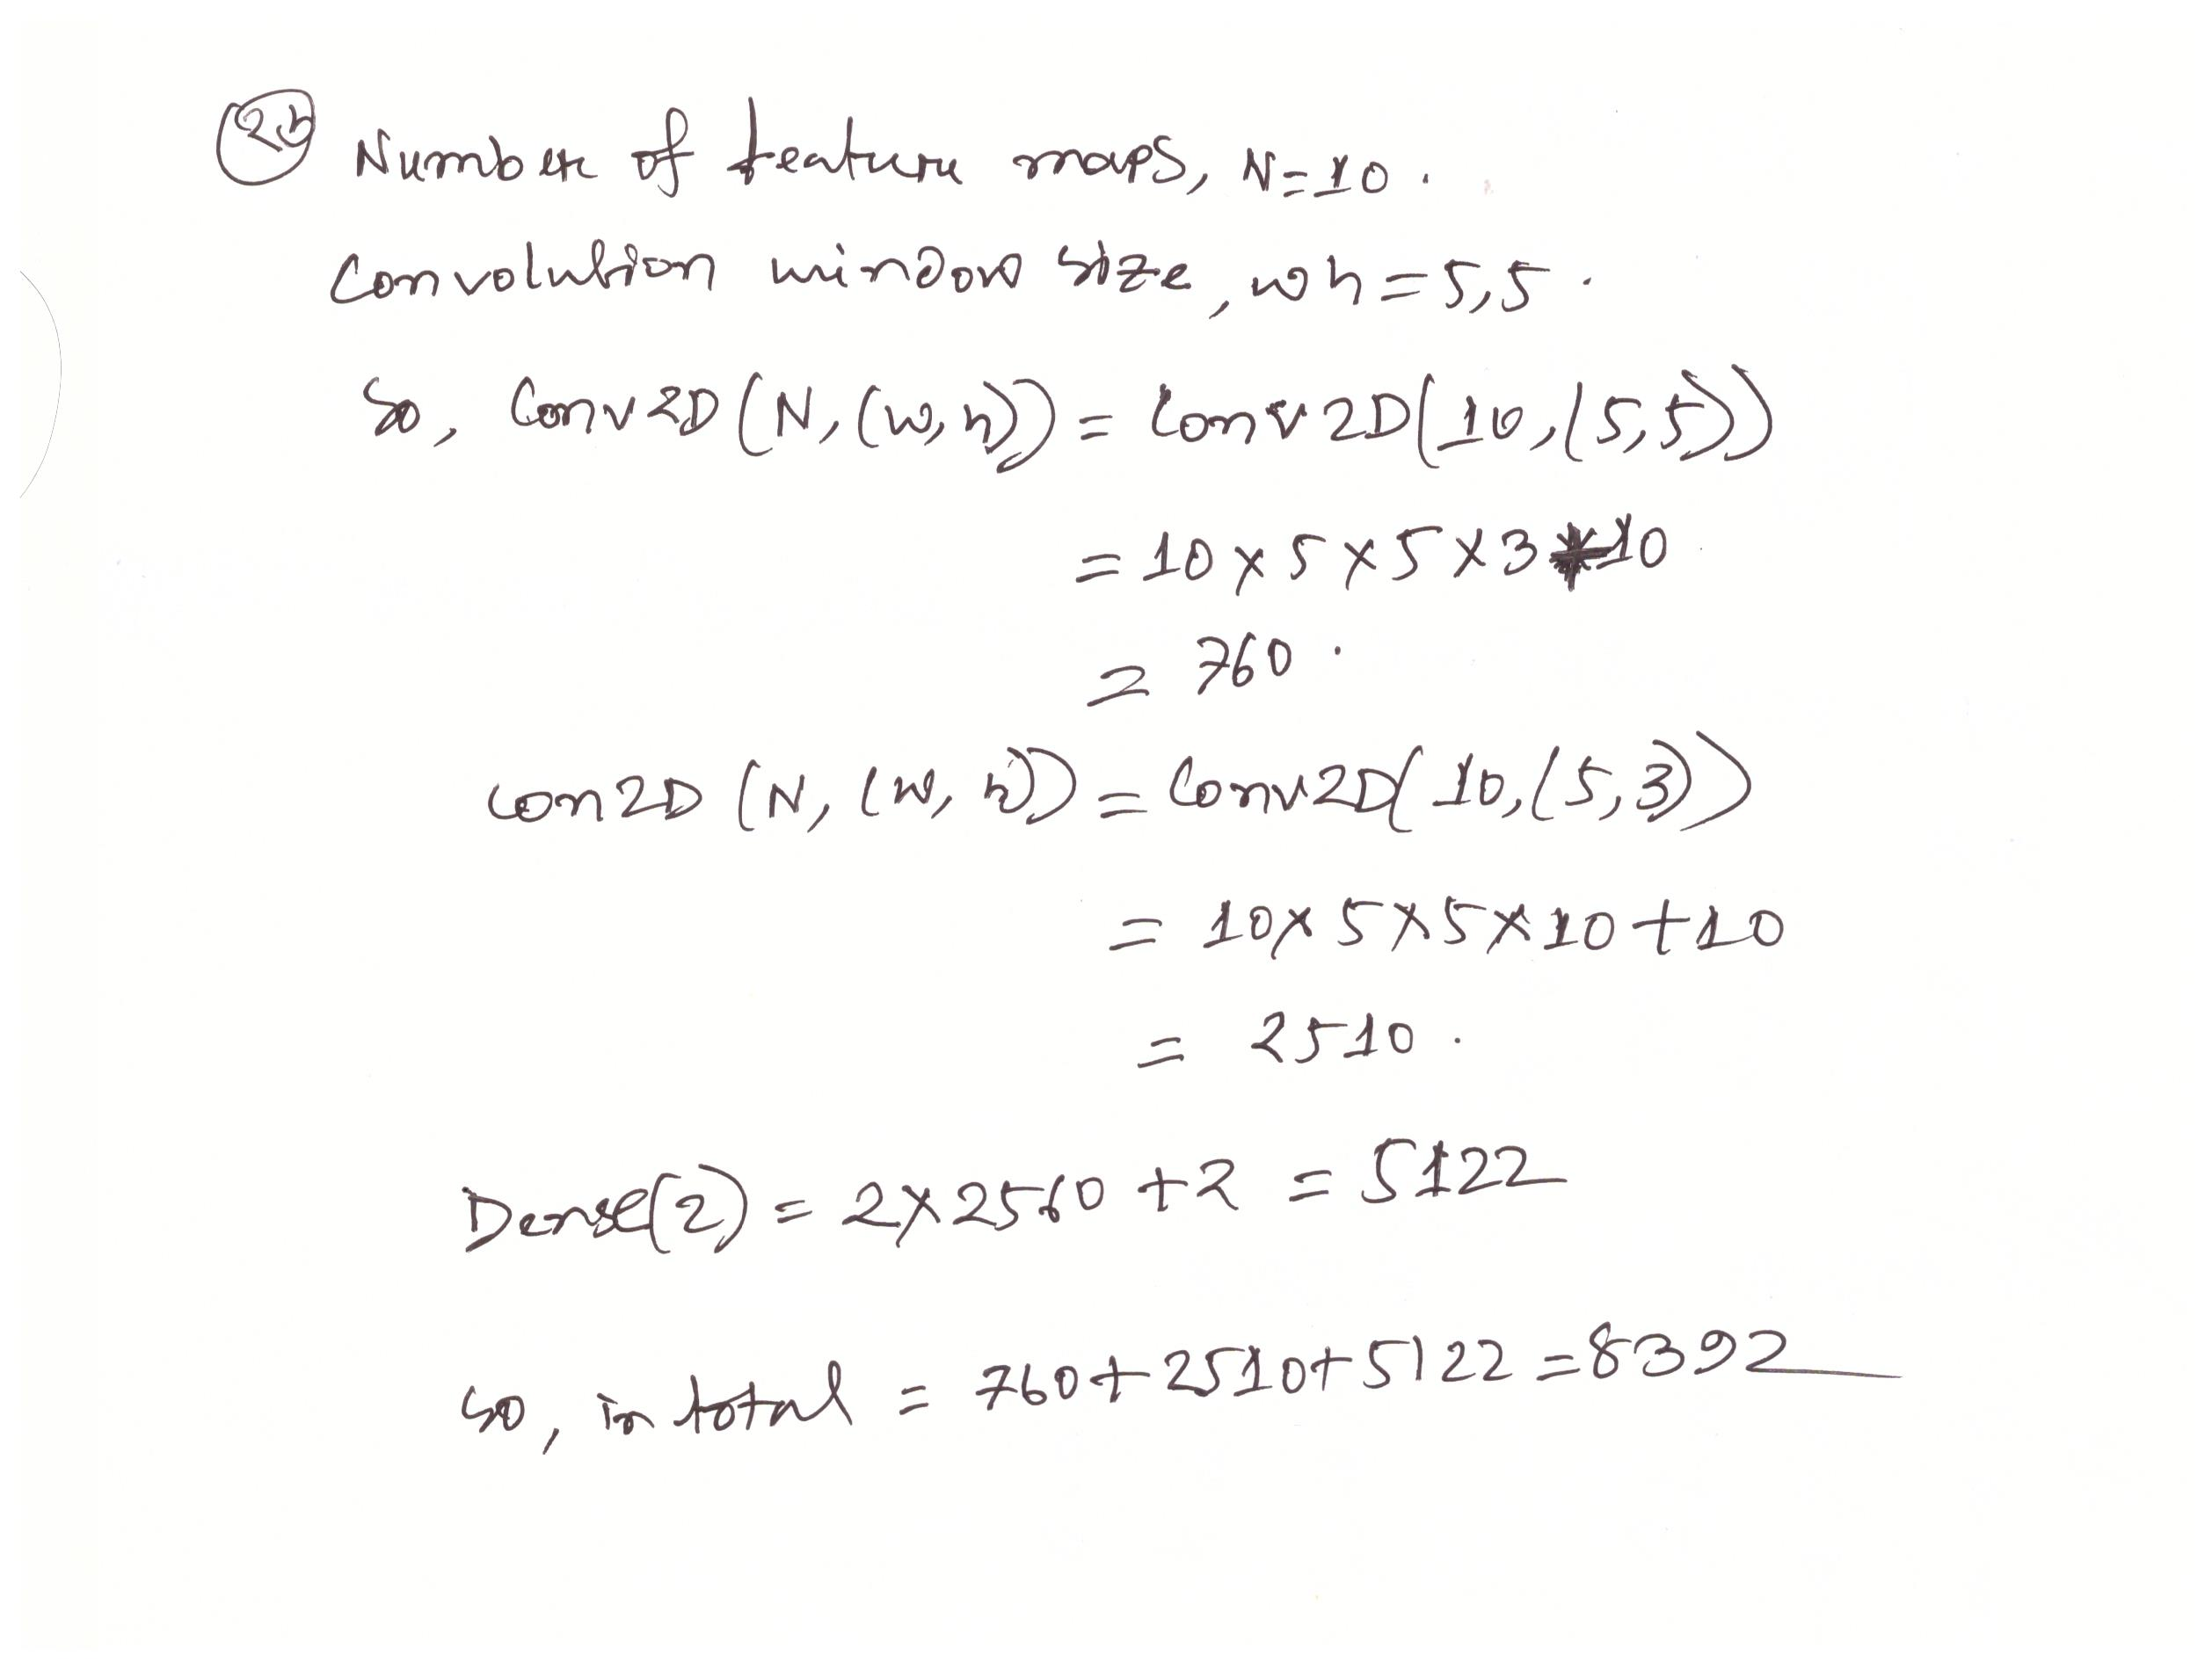

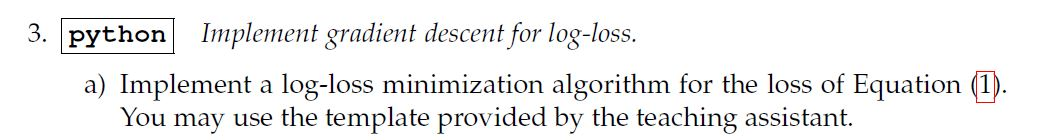

In [1]:

import numpy as np

def gradient(Xn,yn,w):
    exponant=np.exp((-yn.T)*np.dot(w.T,Xn.T))
    rshape=np.ones(exponant.shape)
    denominator=1+exponant
    np.divide(exponant, denominator, out=rshape, where=denominator!=0)
    
    return np.sum(-yn*Xn*rshape.T, axis=0).reshape(w.shape)

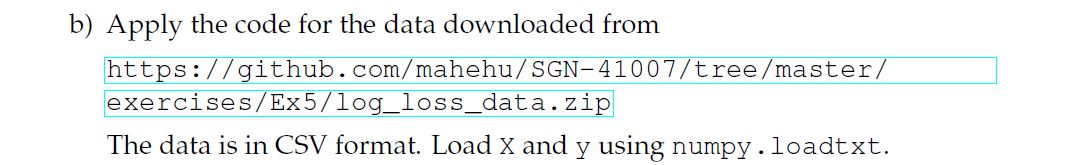

In [2]:
from sklearn.metrics import*

def logLossfunction(Xn,yn,w):
    return np.sum(np.log(1+np.exp((-yn.T)*np.dot(w.T,Xn.T)))) 

In [3]:
numberofiter=100
xu=0.001

X=np.loadtxt("X.csv", delimiter=",")
X=np.concatenate([X,np.ones((X.shape[0],1))], axis=1)

y=np.loadtxt("y.csv", delimiter=",")
y=y.reshape((y.shape[0],1))

In [4]:
ws=np.zeros((numberofiter,X.shape[1]))
correctness=np.zeros((numberofiter,1))

In [5]:
logLossfunctionx=np.zeros((numberofiter,1))
w=np.zeros((X.shape[1],1))

In [6]:
for i in range(numberofiter):   
    w=w-xu*gradient(X,y,w)
    ws[i,:]=w.T
    
    logLossfunctionx[i]=logLossfunction(X,y,w)
   
    probability=(1/(1+np.exp(-(np.dot(w.T,X.T))))).reshape((X.shape[0],1))
    predictiony=np.zeros(y.shape)
    predictiony[probability>0.5]=1
    predictiony[probability<=0.5]=-1
   
    correctness[i]=accuracy_score(y,predictiony)

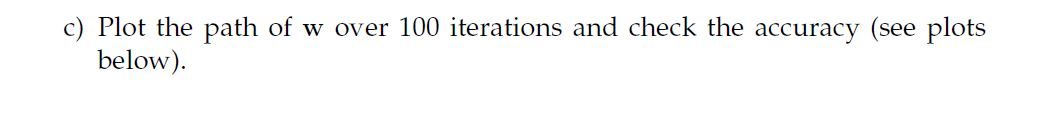
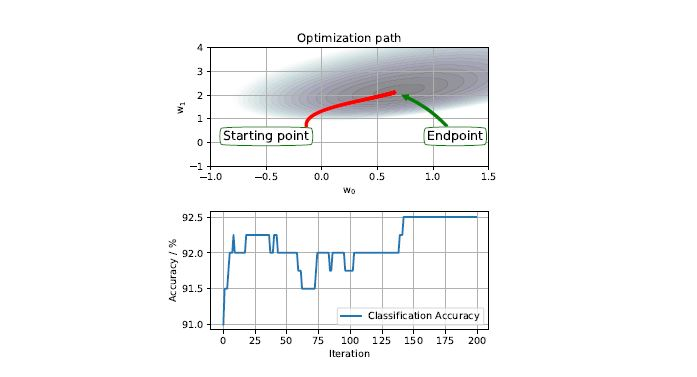

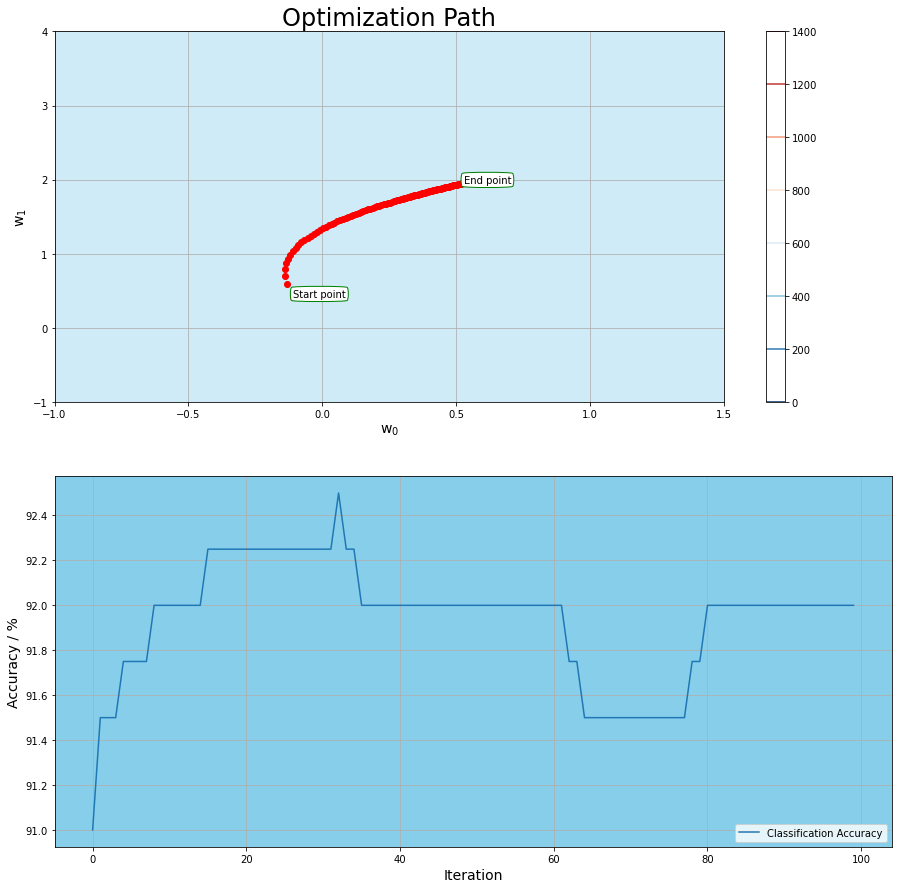

In [7]:
import matplotlib.pyplot as plt
from scipy.interpolate import*

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,15))

ax1.plot(ws[:,0],ws[:,1], 'or')
ax1.annotate("Start point",(ws[0,0],ws[0,1]) ,                 
                  
                  bbox=dict(boxstyle="round4",edgecolor='green', fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),
                  )

ax1.annotate("End point",(ws[-1,0],ws[-1,1]) ,                 
                  
                  bbox=dict(boxstyle="round4",edgecolor='green',  fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),
                  )


linx=np.linspace(-1,1.5,100)
liny=np.linspace(-1,4,100)
linx,liny=np.meshgrid(linx,liny)

W=np.vstack([linx.ravel(),liny.ravel()]).T
W=np.concatenate([W,np.ones((W.shape[0],1))],axis=1)


contr=[logLossfunction(X,y,w) for w in W]
gdata = griddata(W[:,:2], np.asarray(contr),(linx,liny),method='nearest')


main=ax1.contour(gdata, cmap='RdBu_r')
fig.colorbar(main,ax=ax1)  
    
ax1.set_xlim([-1,1.5])
ax1.set_ylim([-1,4])
ax1.set_title("Optimization Path",fontsize= 24)
ax1.set_xlabel('w$_0$',fontsize= 14)
ax1.set_ylabel('w$_1$',fontsize= 14)


ax1.set_facecolor('skyblue')
ax2.set_facecolor('skyblue')
ax1.patch.set_alpha(0.3)
ax1.patch.set_alpha(0.4)

ax1.grid('on')
ax2.grid('on')


ax2.plot(correctness*100)
ax2.set_ylabel("Accuracy / %",fontsize= 14)
ax2.set_xlabel("Iteration",fontsize= 14)
ax2.legend(["Classification Accuracy"],loc="lower right")
plt.show()

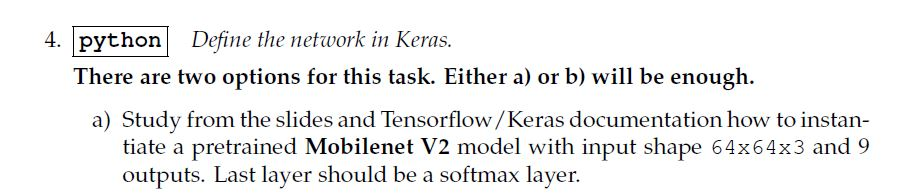

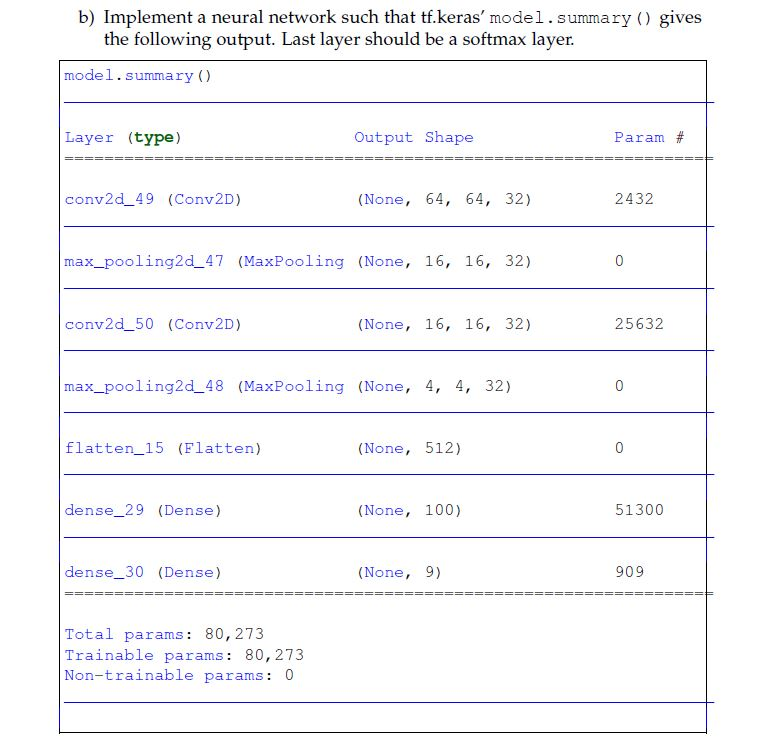

In [18]:
from keras.applications import*
from keras.models import*
from keras.layers import*

model=MobileNetV2(input_shape=(64,64,3),include_top=False, weights="imagenet")
out=model.output
out=Flatten()(out)
output=Dense(9,activation="softmax")(out)

modell=Sequential()
modell.add(Conv2D(32,(5,5),padding='same',activation='relu', input_shape=(64,64,3)))
modell.add(MaxPooling2D(pool_size=(4,4)))
modell.add(Conv2D(32,(5,5),padding='same',activation='relu'))
modell.add(MaxPooling2D(pool_size=(4,4)))
modell.add(Flatten())
modell.add(Dense(100,activation='relu'))
modell.add(Dense(9,activation='softmax'))
modell.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_13 (Dense)             (None, 9)                

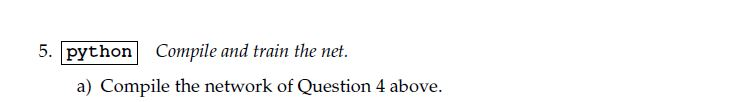

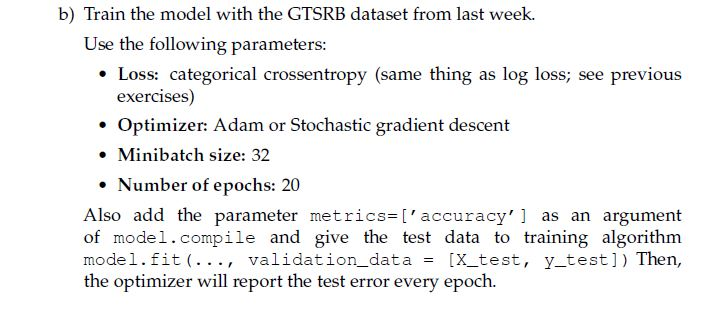

In [15]:
# unzipping

from shutil import unpack_archive
unpack_archive('GTSRB.zip', 'data/')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import*
from sklearn.model_selection import*
from PIL import Image   
import pandas as pd

wrap="data"
directory=""
direct=(directory+wrap)
data=load_files(direct, load_content=False, description=None)
fname=data.filenames


def file_format_check(file):
    if file.split(".")[1]=="jpg":
        return True
    else:
        return False

    
fname=[file for file in fname if file_format_check(file)]

sizes=64
X=np.zeros((len(fname),sizes,sizes,3))
y=np.zeros((len(fname),1))

for i,file in enumerate(fname):    
    imge=Image.open(file).resize((sizes,sizes))    
    imger=np.asarray(imge)/255    
    X[i,:]=imger   
    y[i]=int(file.rsplit(wrap)[1].split("\\")[1])
    
    
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [16]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


modell.compile(loss='categorical_crossentropy',optimizer='adam', metrics=["accuracy"])
modell.fit(X_train,to_categorical(y_train),batch_size=32,epochs=20, validation_data=(X_test,to_categorical(y_test)))

Epoch 1/20
223/223 [==============================] - ETA: 0s - loss: 0.3841 - accuracy: 0.8880

ValueError: in user code:

    D:\ANACONDA\anacondaa\envs\tensorenviron\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    D:\ANACONDA\anacondaa\envs\tensorenviron\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\ANACONDA\anacondaa\envs\tensorenviron\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\ANACONDA\anacondaa\envs\tensorenviron\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\ANACONDA\anacondaa\envs\tensorenviron\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\ANACONDA\anacondaa\envs\tensorenviron\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    D:\ANACONDA\anacondaa\envs\tensorenviron\lib\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    D:\ANACONDA\anacondaa\envs\tensorenviron\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    D:\ANACONDA\anacondaa\envs\tensorenviron\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:158 assert_input_compatibility
        ' input tensors. Inputs received: ' + str(inputs))

    ValueError: Layer sequential_5 expects 1 inputs, but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 64, 64, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 9) dtype=float32>]
